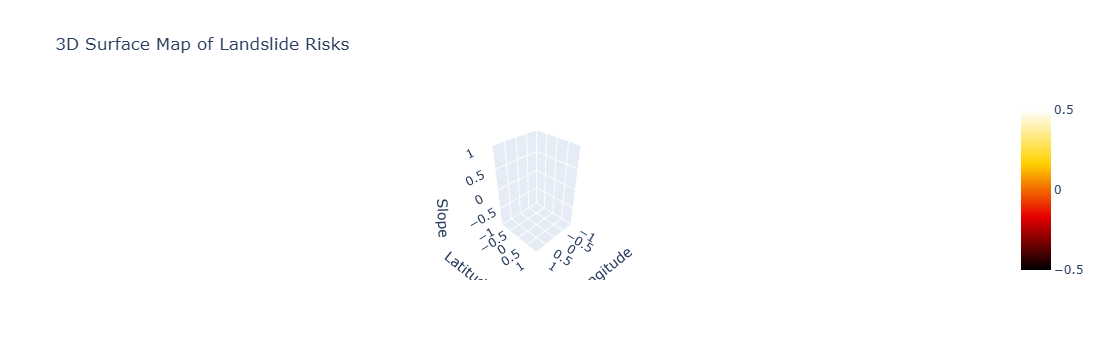

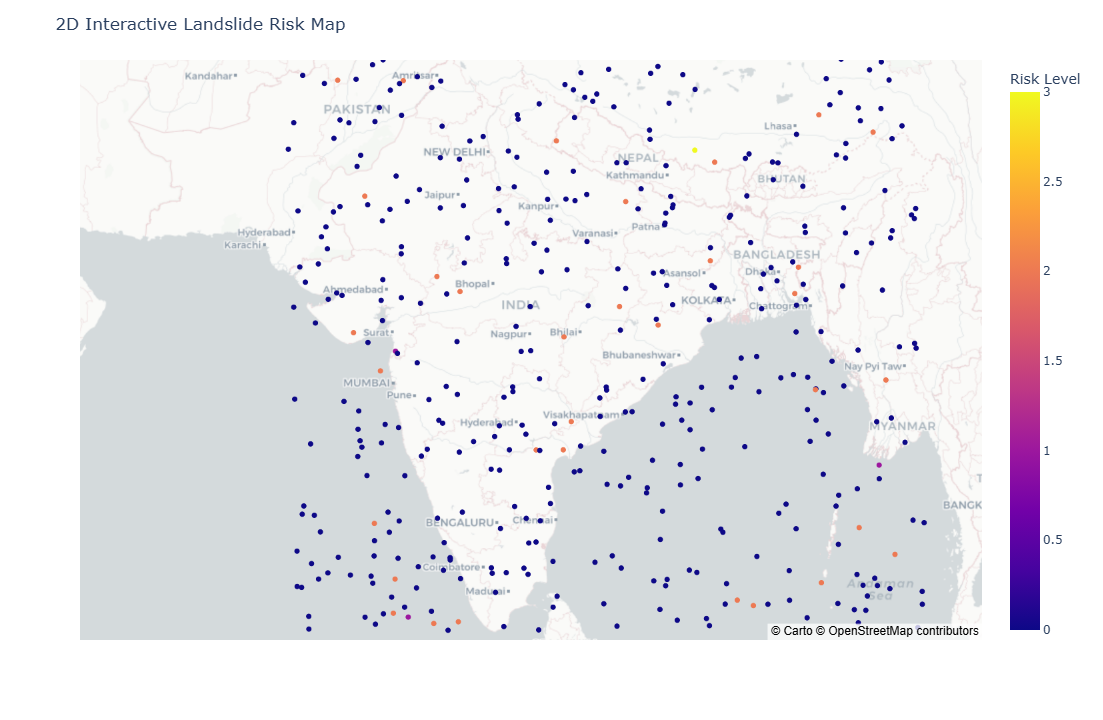

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset
file_path = "landslide_simulation_data_encoded.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Normalize risk levels for color mapping
df["risk_numeric"] = df["Risk Level"].map({"Low": 0, "Monitor Closely": 1, "High": 2, "Extreme": 3})

# 3D Surface Plot
fig_3d = go.Figure(data=[
    go.Surface(z=df["Slope (degrees)"], x=df["Longitude"], y=df["Latitude"], surfacecolor=df["risk_numeric"],
               colorscale="hot", showscale=True)
])
fig_3d.update_layout(title="3D Surface Map of Landslide Risks", scene={"xaxis_title": "Longitude", "yaxis_title": "Latitude", "zaxis_title": "Slope"})

# 2D Scatter Map
fig_2d = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Risk Level",
                           color_discrete_map={"Low": "green", "Monitor Closely": "yellow", "High": "orange", "Extreme": "red"},
                           size_max=10, zoom=4, mapbox_style="carto-positron")
fig_2d.update_layout(title="2D Interactive Landslide Risk Map")

# Show plots
fig_3d.show()
fig_2d.show()
